## Stats 504: Practice and Communication in Applied Statistics

Overall goal: Prepare students to provide master-level statistical support for collaborative, interdisciplinary work and research

- Communicating statistics with non-statistical experts
- Understanding statistical theory and limitations
- Data formatting and statistical programming
- Clear, effective writing
- Using graphics to communicate ideas

## About me
- Worked as a master-level biostatistician for 5 years in HIV/STI research
- Joint PhD at Carnegie Mellon University in Engineering & Public Policy and in Statistics & Data Science
- Thesis topic on non-parametric causal discovery and sexually transmitted infection prevention
- At UM, I'm working in the network statistics research group
- In my experience, there was a big jump from me doing my MS in biostats to work
 - 60% data formatting and cleaning
 - Collaborators expected me to also be an expert in HIV/STI, present at conferences
 - Needed to use methods I never learned before
 - Communicate statistical material with non-statistical experts
 - Gave me some real-world statistical background before my PhD

## Course Layout
- On the job, you will normally be given a problem and you will need to decide which tools to use
- Need to have a "large" toolbox
- Need to communicate what a tool does, how it work, how it meets the needs of the client
- Case studies/data illustrate methods here
    - research question
    - dataset
    - methodology and theory
    - Reproducible code
- Homework
    - attempts to simulate work experience
    - 2-3 page, well-written memo of finding for non-statistical audience
 - Layout:
     - Intro: Introduce topic, explain problem, what you are going to do
     - Methods: explain methodology, and how it achieves stated goals
     - Explain data and results
     - Conclusion: how do these results answer question
     - Appendix: reproducible code (rmarkdown or jupyter notebook)
 - [Writing tips](http://dept.stat.lsa.umich.edu/~kshedden/stats504/topics/writing_tips/)
 - Reproducible code makes your work more transparent to others.  You will be required to submit your reproducible code: [Rmarkdown](https://rmarkdown.rstudio.com), [Jupyter notebook](https://jupyter.org)
 - [Jupyter notebook tutorial](https://www.dataquest.io/blog/jupyter-notebook-tutorial/), [Rmarkdown tutorial](https://r4ds.had.co.nz/r-markdown.html)
- Course code will be in either python3 or R
- Assignments will be given every two weeks and collected two weeks after issued
- Assignments will be assess on writing quality, clarity, reproducible code, statistical correctness
- During class:
   - Lecture notes will be presented in Jupyter Notebook or Rmarkdown
   - You are encouraged to speak up with comments or questions
   - [iClicker](https://www.iclicker.com) mobile app to survey class in-person and remote
- Homework, lecture notes over canvas
- Piazza: piazza.com/umich/fall2021/stats504
- All lecture notes on Github https://github.com/omesner/UMSTATS504
- Course Survey

### COVID and attendance

- We all need to fill out the [ResponsiBlue](https://responsiblue.umich.edu/home) COVID-19 Screening Check every day we come to campus (university policy)
- Masks are required indoors everywhere (university policy)
- Social distancing is not required (university policy)
- As of 8/27 92% students, 89% faculty, 73% staff confirmed fully vaccinated
- If you are feeling sick, it is important to stay home to rest and limit the spread of infection
    - Live lectures will be available on zoom at https://umich.zoom.us/j/93116796505 with passcode 504
    - Would recording lectures be helpful?
- If you are not sick, you strongly encouraged to attend class in person
    - It is easier to stay engaged and ask questions in person
    - COVID vaccination is required for everyone on campus with limited exemptions
    - We will follow university policy on wearing masks

### Student Well-Being

- Experiencing some amount of stress during graduate school is normal
- Too much stress can impact academic performance and personal well-being
- In academia, evaluation is necessary but also a significant source of stress for many
- In this course, we will be evaluating your writing quality, code, graphics, and tables
- Reading critiques can be difficult but are meant to help develop professional skills
- My goal is to develop your skills
- I want to be aware of the time assignments take
- I want your feedback
- Generally, if you are experiencing concerns related to this course or otherwise, please contact me (omesner@umich.edu) so that we can work on solutions
- Other [resources for student well-being](https://wellbeing.studentlife.umich.edu/resources-list)

## Cyclist Crossing the Brooklyn Bridge
- Scenario: New York Bicycling Coalition wants to better understand the effect of weather and time on cycling in the city
- The dataset below gives the number of bikes that cross the Brooklyn Bridge each day between 1 April 2017 and 31 October 2017
- We want to understand which variables are associated with the number of crossings
- This lecture is in python but some will be in R as well
- It's ok if you're not familiar with python or shell command
- We will be using the following modules in python3
 - Note: the percent sign (%) in jupyter lets us run shell commands

In [23]:
%%capture
%pip install pandas
%pip install statsmodels
%pip install numpy
%pip install matplotlib

Above: you can remove suppress unhelpful output in Jupyter notebook with `%%capture`

Below: importing the following modules

In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
import matplotlib.pyplot as plt
import calendar

First several lines of data file

In [25]:
file = open('bike.csv')
for _ in range(6):
    print(file.readline())

Date,HIGH_T,LOW_T,PRECIP,BB_COUNT

1-Apr-17,46.00,37.00,0.00,606

2-Apr-17,62.10,41.00,0.00,2021

3-Apr-17,63.00,50.00,0.03,2470

4-Apr-17,51.10,46.00,1.18,723

5-Apr-17,63.00,46.00,0.00,2807



read in data and get month, day of week, and day from date

In [26]:
df = pd.read_csv('bike.csv', header=0, infer_datetime_format=True, 
                 parse_dates=[0], index_col=[0])
ds = df.index.to_series()
df['MONTH'] = ds.dt.month
df['DAY_OF_WEEK'] = ds.dt.dayofweek
df['DAY'] = ds.dt.day
df['WEEKEND'] = df['DAY_OF_WEEK'].apply(lambda x: x in [5,6])*1 
# checked the 2017 calendar

Visually inspecting data

In [27]:
df.head(10)

,HIGH_T,LOW_T,PRECIP,BB_COUNT,MONTH,DAY_OF_WEEK,DAY,WEEKEND
Date,,,,,,,,
2017-04-01,46.0,37.0,0.00,606,4,5,1,1
2017-04-02,62.1,41.0,0.00,2021,4,6,2,1
2017-04-03,63.0,50.0,0.03,2470,4,0,3,0
2017-04-04,51.1,46.0,1.18,723,4,1,4,0
2017-04-05,63.0,46.0,0.00,2807,4,2,5,0
2017-04-06,48.9,41.0,0.73,461,4,3,6,0
2017-04-07,48.0,43.0,0.01,1222,4,4,7,0
2017-04-08,55.9,39.9,0.00,1674,4,5,8,1
2017-04-09,66.0,45.0,0.00,2375,4,6,9,1


Size of dataset: (rows, columns)

In [28]:
df.shape

(214, 8)

- Show the number of missing variables
- show means and st dev
- overall order statistics
- Frequently, applied papers will want to see a table giving mean (st dev) or medians (IQR)

In [29]:
df.describe()

,HIGH_T,LOW_T,PRECIP,BB_COUNT,MONTH,DAY_OF_WEEK,DAY,WEEKEND
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,74.201869,62.027103,0.132430,2680.042056,7.009346,3.000000,15.789720,0.289720
std,10.390443,9.305792,0.394004,854.710864,2.002324,2.016365,8.848102,0.454696
min,46.000000,37.000000,0.000000,151.000000,4.000000,0.000000,1.000000,0.000000
25%,66.900000,55.225000,0.000000,2298.000000,5.000000,1.000000,8.000000,0.000000
50%,75.900000,64.000000,0.000000,2857.000000,7.000000,3.000000,16.000000,0.000000
75%,82.000000,70.000000,0.037500,3285.000000,9.000000,5.000000,23.000000,1.000000
max,93.900000,78.100000,3.030000,4960.000000,10.000000,6.000000,31.000000,1.000000


#### Visual variable distributions
- Consider kinds of variables in the data
- Consider size of dataset (rows and columns)
- Look for anything strange in the data

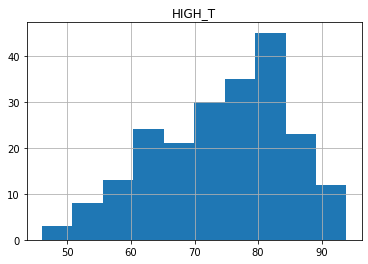

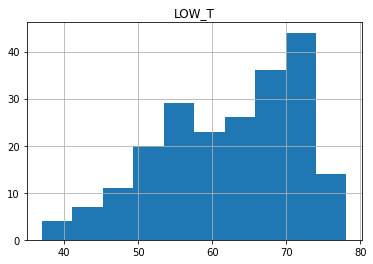

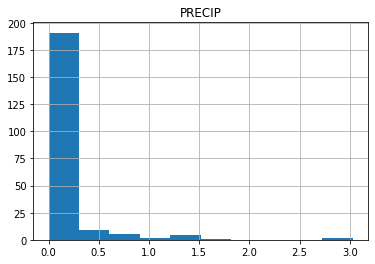

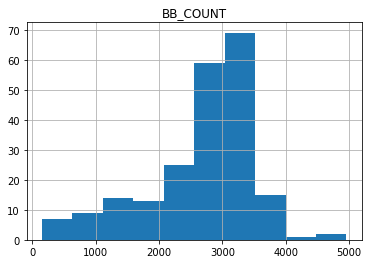

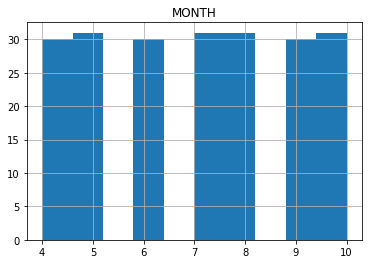

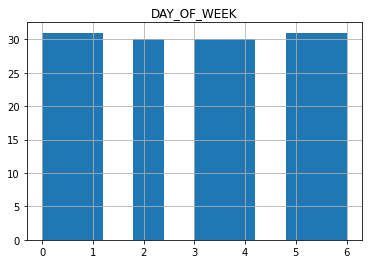

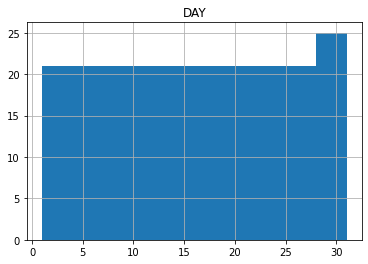

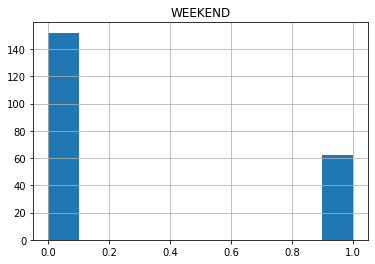

In [30]:
%matplotlib inline
df.columns
for var in df.columns:
    df.hist(column=var)

#### scatter plots

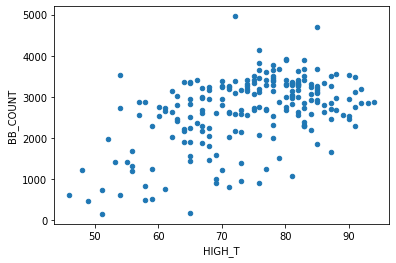

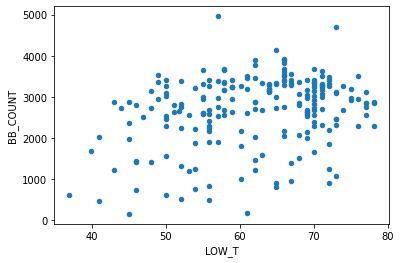

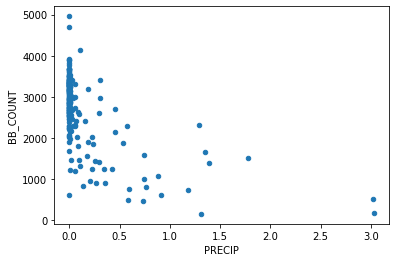

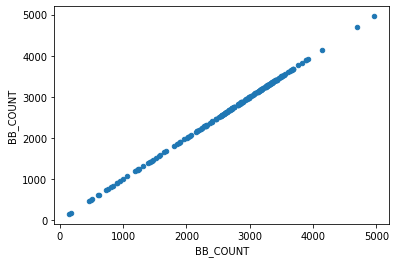

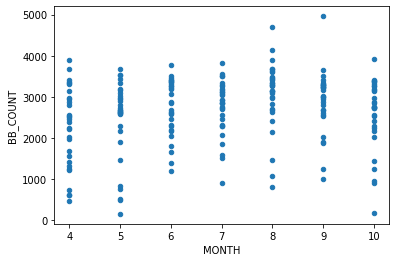

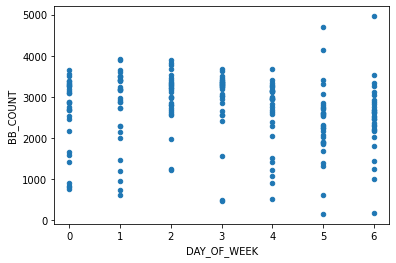

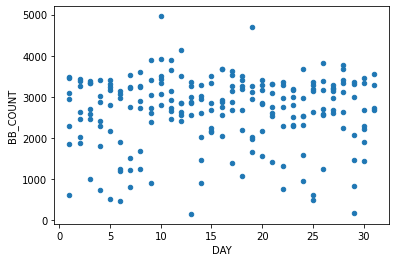

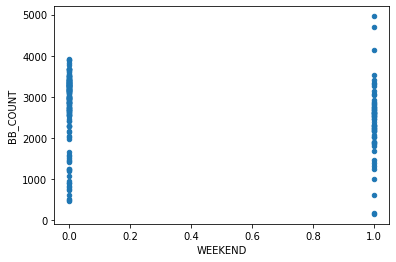

In [31]:
for var in df.columns:
    df.plot.scatter(x=var, y='BB_COUNT')

- Converting numeric month to name
- Including appropriate boxplots

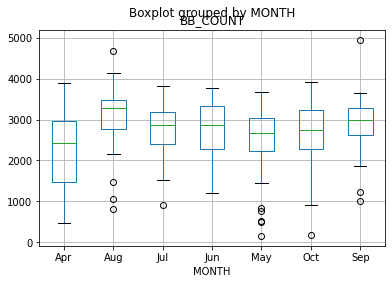

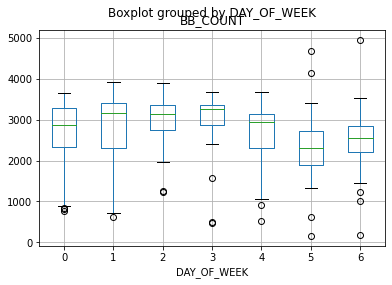

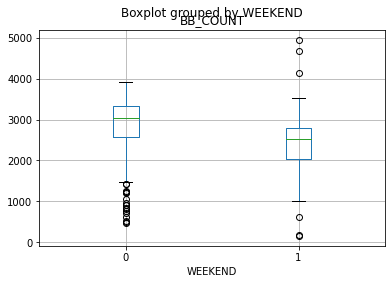

In [32]:
df['MONTH'] = df['MONTH'].apply(lambda x: calendar.month_abbr[x])
for var in ['MONTH', 'DAY_OF_WEEK', 'WEEKEND']:
    df.boxplot(column='BB_COUNT', by=var)

**Coding tip: DRY - Don't Repeat Yourself**

## Generalized Linear Models
- Robust class of models that are frequently used in classical statistics


- Models a function of conditional expectation as a linear function:
$$g(E[Y|X=x])=\beta_0+\beta_1x_1+\dots+\beta_px_p$$


- $g$ called a link function and should be invertible
$$E[Y|X=x]=g^{-1}(\beta_0+\beta_1x_1+\dots+\beta_px_p)$$


- Most common link functions are $g(x)=x$ and $g(x)=\log(x)$


- How is $g(E[Y|X=x])$ different from $E[g(Y)|X=x]$?


- Two examples:
 * *Gaussian linear model:* 
 * *Poisson log-linear mode:*
 
 
- In general, which model to use depends on the distribution of $Y$


- GLMs specify both conditional mean structure and conditional variance structure


- example: $Y|X=x\sim \text{Poisson}(x)$ then $E[Y|X]=x$ and $\text{Var}[Y|X]=x$


- Can we use a Poisson model if $E[Y|X]\neq\text{Var}[Y|X]$ in data?  Yes


- Overdispersion: $\text{Var}[Y|X]=\phi E[Y|X]$ for $\phi\geq 0$
 
 
- In general, data does not need to be perfect to use a model


- Common GLMs:
    - Binomial (logistic)
    - Poisson
    - Negative Binomial
    - Gaussian
 
 
- Which model should we try for the bike count data?

### Poisson Regression and Parameter Estimation
- Random sample $(y_1, x_1), \dots, (y_n, x_n)$
 * $x_i=[1, x_{i1}, \dots, x_{ip}]$ where we include the 1 for the intercept
 
 
- Recall the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) gives the probability of a given number of independent events occurring in a fixed space or time at a constant rate
    - Example: number of calls received per hour at call center or number of people arriving at a restaurant
    - PDF: $p(x) = \frac{\lambda^x}{x!}\exp(-\lambda)$
    - Expected value: $E[X] = \lambda$
    
    
- Assume $\log E[Y|X=x]=\beta^T x$ so that $\lambda = \exp(\beta^Tx)$
and
$$\begin{align}
p(y|x;\beta)
&=\frac{\lambda^y}{y!}\exp(-\lambda) \\
&= \frac{\exp\left(y\beta^T x\right)}{y!}\exp\left(-\exp(\beta^T x)\right)
\end{align}$$


- Want to estimate $\beta$; use log-likelihood:
$$
\begin{align}
\ell(\beta) 
&= \log\left(\prod_{i=1}^n p(y_i|x_i;\beta)\right) \\
&= \log\left( \prod_{i=1}^n \frac{\exp\left(y_i\beta^T x_i\right)}{y!}\exp\left(-\exp(\beta^T x_i)\right) \right)\\
&= \sum_{i=1}^n \left(y_i \beta^T x_i - \log(y_i!) -\exp(\beta^T x_i)\right)
\end{align}
$$


##### Optimization

- Want to find $\beta^* = \arg\max_\beta \ell(\beta)$


- Remember that $\log p \leq 0$ because $p \leq 1$
    - Because $\log x$ is monotonically increasing, so maximize $p$ if and only if maximize $\log p$ ($\log p \leq 0$, trying to get close to zero)


- Intuition: Set $\frac{\partial}{\partial \beta}\ell(\beta) =0$ and solve


- Here $\nabla\ell(\beta)=0$ is not simple to solve


- Because $-\nabla^2 \ell(\beta)$ [semi-positive definite](https://en.wikipedia.org/wiki/Definite_symmetric_matrix) matrix, we know that $-\ell(\beta)$ is a convex function

<img src="./convex.png" width="300">


We can use a convex optimization technique such as [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent):


   1. Calculate $\nabla \ell(b)$ where $b\in\mathbb{R}^{p+1}$
 $$
 \nabla \ell(b) = \sum_{i=1}^n y_i x_i - x_i \exp(b^T x_i)
 $$
 
 
   2. Choose a starting point $b_0$ in the $\mathbb{R}^{p+1}$ (the space where $\beta$ is)
 
 
   3. Choose a step size, $\gamma$
 
 
   4. Algorithm, step $j$:
    $$b_{j+1} \leftarrow b_j+\gamma \nabla\ell(b_j)$$
 
 
   5. Stop algorithm when $\ell(b_j)\geq \ell(b_{j+1})$ 
 
 
   6. Set $\beta \leftarrow b_j$
 
 
 Note: It's more common to make $\gamma$ decrease as the algorithm progresses
 
 <img src="./Gradient_descent.svg.png" width="300">
 
Image from Wikipedia


- Why not use [Newton-Raphson](https://en.wikipedia.org/wiki/Newton's_method)?


- In step 4, why are we adding for gradient descent?


### Model fitting theory
- To assess model fit, we typically compare the true outcome values, $y_i$, to the corresponding expected (fitted) values from the model, $\hat \mu_i$


- In theory, the goal is to choose a model that accurately describes or predicts the data


- Model selection:
 - choosing type of model
 - choosing variables to include in model a particular model
 - choosing interactions
 - choosing transformations or splines
 
**Deviance**

- Comes from [likelihood ratio test](https://en.wikipedia.org/wiki/Likelihood-ratio_test):
$$\lambda_{\text{LR}}= -2\log\left[ \frac{\sup_{\theta\in\Theta_0} \mathcal{L}(\theta)}{\sup_{\theta\in\Theta} \mathcal{L}(\theta)} \right]=-2\left[\ell(\theta_0)-\ell(\theta)\right]$$


 - $\theta_0$ is the current model and $\theta$ is the saturated model (using the data itself)
 
 
 - For Poisson deviance:
 $$
 \text{DEV} = -2\left[\sum_{i=1}^n y_i\log\frac{\mu_i}{y_i} + \sum_{i=1}^n (y_i-\mu_i)\right]
 $$
- Small deviance indicates a good fit


- Deviance is typically calculated for likelihood-based models in software packages


- The deviance statistic follows a chi-squared distribution


- Sometimes observation-level values are used similar to residuals in linear regression


- Can be used to compare different *nested* models


- I'm not sure how often it is used in practice


- Notice that deviance will change if observations are taken away (or added)


- if using deviance to choose variables, important to look at missing data


**AIC**

- Akaike Information Criterion


- Derived from the Kullback-Leiber (KL) divergence metric for distributions


- Let $p$ and $q$ be densities, then the KL divergence between p and q is defined as
$$
K(p, q) = \int p(x)\log \frac{p(x)}{q(x)}dx
$$


- [Gibb's inequality](https://en.wikipedia.org/wiki/Gibbs'_inequality): For any densities, p, and q
$$ K(p, q) \geq 0 $$


- If $K(p,q)$ is small, then $p$ and $q$ are close


- $p=q$ if and only if $K(p,q)=0$ (perfect fit)


- Now, let $p$ be the true, unknown (conditional) density of the data and let $q = \hat p$ be the model, $\hat p(y)= \hat p(y|x;\beta)$:
$$
K(p, \hat p) = \int p(y)\log \frac{p(y)}{\hat p(y)}dy
$$


- So, we want to find a model, $\hat p$, that makes $K(p,\hat p)$ small


- Using Gibb's inequality,
$$
K(p, \hat p) = \int p(y)\log p(y)dy - \int p(y)\log \hat p(y)dy \geq 0
$$


- Check that $\log p(y), \log \hat p(y) \leq 0$, because $p(y), \hat p(y)\leq 1$, so that the first integral above is negative and the second integral is positive


- Rearranging so that both terms are positive,
$$
-\int p(y)\log p(y)dy \leq - \int p(y)\log \hat p(y)dy
$$


- Because the first term does not depend on the model, $\hat p$, we only need to consider
$$
\hat M=-\int p(y)\log \hat p(y)dy
$$


- In fact, we want to choose $\hat p$ to minimize $\hat M$ to minimize $K$


- Because $\hat M = -E[\log\hat p(Y)]$, it's reasonable to estimate $M$ as
$$
\hat M \approx -\frac{1}{n}\sum_{i=1}^n \log \hat p(y_i|x_i;\beta)=-\frac{\ell(\hat p)}{n}
$$


- This estimate is very biased because the data are used twice: once to get the MLE and once to estimate the integral
    - Recall: If we are trying to estimate a parameter, $\theta$, using some estimator, $\hat \theta$,
    $$\text{Bias}(\hat \theta) = \hat \theta - \theta$$


- Akaike showed that $$\text{Bias}(\hat M)\approx -\frac{d}{n}$$ where $d$ is the dimension of the parameter space of $\beta$, the number of parameters being estimated


- Subtracting out the bias and multiplying by $2n$,
$$
\text{AIC}(\hat p) = 2n\left(\hat M -\text{Bias}(\hat M)\right) = -2\ell(\hat p)+2d
$$


- Thus, the model with a smaller AIC should be a better fit



- AIC can be used to compare models that use *likelihood*: maximizes product of probabilities
    - does not have to be nested (like deviance)


- Again, watch out for missing data - some programs will drop any row with missing values which will change AIC


- Question: Is this clear?
    - a) yes
    - b) no


**BIC**
- [Bayesian Information Criterion](https://en.wikipedia.org/wiki/Bayesian_information_criterion)


- Similar development to AIC, except it uses a [Bayesian](https://en.wikipedia.org/wiki/Bayesian_statistics) paradigm
    - Assumes parameters are random variables and have distributions themselves
    - In Bayesian statistics, we must choose the distribution we want our parameters to have, called a *prior distribution*


- Choose model to minimize
$$
\text{BIC}(\hat p)=-2\ell(\hat p)+ d\log n
$$


- BIC tends to choose simpler models (models with fewer parameters) than AIC


- **Practice**: If fewer variables in a model is helpful, BIC may be a better choice than AIC


**Cross Validation**
- This method randomly splits the data into a training set and a test set


- Training set used to fit the model


- Test set used to make new predictions then compare predictions to actual values


- Used more in data science and machine learning


- More general than AIC/BIC because it compares predictions with data
    - does not require likelihoods


- Will discuss later in the course


**Post Selection Inference**


- If you search through *too many* models, standard inference (standard errors, confidence intervals, p-values), are no longer valid


- This is different that p-hacking but related


- Problem: using same data twice, once for model selection, again for model fitting


- Analogy: expecting sample mean to have same distribution as the sample max


- Fixes: Use valid post selection methods, split data, get expert help to choose a model



### Model fitting in practice
- In many settings, the goal is to understand associations with an outcome


- The goal is not to fit the perfect model


- Even though GLMs are association models, investigators will use these models to attempt to explain a causal relationship using expert subject-matter knowledge


- Many researchers will always want to see the variable of interest in the model, even when it does not improve model fit


- In some cases, researcher also want more information (more variables) 


- Model selection often needs to be a discussion to determine how to meet the goals of the current work


- Often, there is room for several good models


- Good idea to run *sensitivity analyses*: changing model/assumptions to understand how *robust* outcomes are under varying models/assumptions



### Bike Crossings Regression Modeling
- In this case, we don't have a lot of information about what the client wants other than generally understand how each variable is associated with the outcome


- Because there are not a lot of variables and many rows, it's not a problem to include them all
    - There is no rule on how large $\frac{n}{p}$ needs to be
    - $n=$ number of rows, $p=$ number of parameters to estimate


- Note that because all of the information in WEEKEND is already in DAY_OF_WEEK, we exclude day of week ([multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity))


- It would be also be reasonable to include DAY_OF_WEEK as a categorical variable


- Remember, when using a software package for the first time, look over the [documentation](https://www.statsmodels.org/stable/glm.html)



In [33]:
df['HIGH_T10'] = df['HIGH_T']/10
df['LOW_T10'] = df['LOW_T']/10
expr = 'BB_COUNT ~ DAY + WEEKEND + MONTH + HIGH_T10 + LOW_T10 + PRECIP'
bikePoisson = sm.GLM.from_formula(
    expr, data=df, family=sm.families.Poisson()).fit()
bikePoisson.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               BB_COUNT   No. Observations:                  214
Model:                            GLM   Df Residuals:                      202
Model Family:                 Poisson   Df Model:                           11
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14552.
Date:                Tue, 07 Sep 2021   Deviance:                       27040.
Time:                        20:12:29   Pearson chi2:                 2.68e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.1675      0.013    571.897      0.000       7.143       7.192
MONTH[T.Aug]     0.2194      0.006     35.817      0.000       0.207       0.231
MONTH[T.Jul]     0.1277      0.007     19.128      0.000       0.115       0.141
MONTH[T.Jun]     0.1443      0.006     23.676      0.000       0.132       0.156
MONTH[T.May]     0.0932      0.005     17.150      0.000       0.083       0.104
MONTH[T.Oct]     0.1046      0.005     19.322      0.000       0.094       0.115
MONTH[T.Sep]     0.1480      0.006     25.455      0.000       0.137       0.159
DAY              0.0007      0.000      4.490      0.000       0.000       0.001
WEEKEND         -0.1185      0.003    -39.174      0.000      -0.124      -0.113
HIGH_T10         0.2477      0.003     81.744      0.000       0.242       0.254
LOW_T10         -0.1866      0.004    -50.356      0.000      -0.194      -0.179
PRECIP          -0.7697      0.007   -112.563      0.000      -0.783      -0.756
================================================================================
"""

- Question: Can we put the table above in the body of a report?
    - a) yes
    - b) no
    - why?


- What might be problematic with this model above?


- Again, assuming Poisson distributed data assumes
$$E[Y|X;\beta]=\text{Var}[Y|X;\beta]$$


- If this does not hold, the parameter point estimates will still be accurate but the variance and confidence intervals will be off


- Variance is important for inference (statistical significance) but if the goal is prediction, having the correct variance structure is not as important


- For *statistical inference*, we need to focus on the mean and variance models


- Question: Do we *always* need to the variance to be approximately correct?
    - a) yes
    - b) no


- In the statsmodels python module, setting `scale="X2"` in the [`fit` method](https://www.statsmodels.org/stable/generated/statsmodels.genmod.generalized_linear_model.GLM.fit.html) estimates the scale parameter as Pearson’s chi-square divided by df_resid for the entire sample


- Using this, we allow $\text{Var}[Y|X;\beta]=\phi E[Y|X;\beta]$ for $\phi>0$


- Note: This is no longer a likelihood-based model, but rather quasi-likelihood, so it is not appropriate to use AIC to compare


- Quasi-likelihood objective function
$$Q(\beta) = \sum_i \frac{(y_i-\mu_i(\beta))^2}{\phi \text{Var}(\mu_i(\beta))}$$
where $\mu_i(\beta)$ is the model fitted value and $\text{Var}(\mu_i(\beta))$ is the model variance


- Use its gradient for optimization
$$\nabla_\beta Q = \sum_i \nabla_\beta \mu_i(\beta)\frac{2(y_i-\mu_i(\beta))}{\text{Var}(\mu_i(\beta))}$$


- We can use Quasi-AIC (QAIC or QIC) to compare different quasi-likelihood-based models


- The scale parameter is estimated as 
$$\hat \phi = \sum_i \frac{(y_i-\hat\mu_i)^2}{(n-p)V(\hat\mu_i)}$$


- Because this is count data, it probably follows some conditional Poisson distribution given all the necessary variables and transformations


- It may be possible to construct a model with $\hat\phi\approx 1$



In [34]:
bikePoisOD = sm.GLM.from_formula(
    expr, data=df, family=sm.families.Poisson()).fit(scale="X2")
bikePoisOD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               BB_COUNT   No. Observations:                  214
Model:                            GLM   Df Residuals:                      202
Model Family:                 Poisson   Df Model:                           11
Link Function:                    log   Scale:                          132.85
Method:                          IRLS   Log-Likelihood:                -109.54
Date:                Tue, 07 Sep 2021   Deviance:                       27040.
Time:                        20:12:29   Pearson chi2:                 2.68e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.1675      0.144     49.617      0.000       6.884       7.451
MONTH[T.Aug]     0.2194      0.071      3.107      0.002       0.081       0.358
MONTH[T.Jul]     0.1277      0.077      1.660      0.097      -0.023       0.278
MONTH[T.Jun]     0.1443      0.070      2.054      0.040       0.007       0.282
MONTH[T.May]     0.0932      0.063      1.488      0.137      -0.030       0.216
MONTH[T.Oct]     0.1046      0.062      1.676      0.094      -0.018       0.227
MONTH[T.Sep]     0.1480      0.067      2.208      0.027       0.017       0.279
DAY              0.0007      0.002      0.390      0.697      -0.003       0.004
WEEKEND         -0.1185      0.035     -3.399      0.001      -0.187      -0.050
HIGH_T10         0.2477      0.035      7.092      0.000       0.179       0.316
LOW_T10         -0.1866      0.043     -4.369      0.000      -0.270      -0.103
PRECIP          -0.7697      0.079     -9.766      0.000      -0.924      -0.615
================================================================================
"""

- In the model above, the scale parameter = 133 >> 1 indicating overdispersion


- There are tests, but a reasonable heuristic is $\hat\phi > 1.5$


- Notice that the 'coef' estimates between both models are similar but the 'std err' values are very different


- std err from the overdispersion model $=SE_{OD}(\hat\beta)= \sqrt{\hat\phi} SE(\hat\beta)$ where $SE(\hat\beta)$ is the std err from the Poisson model


- Comparing quasi-likelihood-based models, we can use QAIC
$$QAIC = -2Q_j+2p_j$$
where $QAIC_j$ and $p_j$ are the quasi-likelihood and parameter count for model $j$



**Negative Binomial Regression**

- Another option is to assume a negative binomial (NB) distribution


- What does [negative binomial](https://en.wikipedia.org/wiki/Negative_binomial_distribution) actually model?
    - a) number of successes in a sequence of $n$ independent Bernoulli trials
    - b) number of independent events occurring in a fixed interval of time or space with a constant rate
    - c) number of successes in a sequence of independent Bernoulli trials before a specified number of failures occurs
    - d) number of successes in n draws, without replacement, from a finite population of size $N$ that contains exactly $K$ successes


- While it's clear that the count data do not have a NB distribution, this model gives more flexibility for modeling variance than Poisson


- Remember: Our goal is to quantify the relationship between the variables and the outcome
    - The model we present will almost certainly not be perfect but it can still be helpful


- NB relaxes the assumption that $E[Y|X]=\text{Var}[Y|X]$


- If $Y|X\sim\text{Negative Binomial}(r,p)$ then
$$\text{Var}[Y|X] = E[Y|X]+\alpha E[Y|X]^2$$


- Technically, NB can also be modeled with overdispersion as well
    - We would probably not use here
    - Why?



In [35]:
bikeNB = sm.GLM.from_formula(
    expr, data=df, family=sm.families.NegativeBinomial()).fit()
bikeNB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               BB_COUNT   No. Observations:                  214
Model:                            GLM   Df Residuals:                      202
Model Family:        NegativeBinomial   Df Model:                           11
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1892.6
Date:                Tue, 07 Sep 2021   Deviance:                       15.590
Time:                        20:12:29   Pearson chi2:                     13.8
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.9052      0.620     11.138      0.000       5.690       8.120
MONTH[T.Aug]     0.2352      0.319      0.738      0.461      -0.390       0.860
MONTH[T.Jul]     0.1573      0.341      0.461      0.644      -0.511       0.825
MONTH[T.Jun]     0.1923      0.310      0.620      0.535      -0.416       0.801
MONTH[T.May]     0.1375      0.264      0.521      0.602      -0.380       0.654
MONTH[T.Oct]     0.1265      0.269      0.471      0.638      -0.400       0.653
MONTH[T.Sep]     0.1668      0.297      0.561      0.575      -0.416       0.750
DAY              0.0005      0.008      0.058      0.954      -0.015       0.016
WEEKEND         -0.1170      0.152     -0.771      0.441      -0.415       0.181
HIGH_T10         0.3157      0.153      2.065      0.039       0.016       0.615
LOW_T10         -0.2315      0.190     -1.215      0.224      -0.605       0.142
PRECIP          -0.6564      0.184     -3.575      0.000      -1.016      -0.297
================================================================================
"""

- Using AIC to choose a model: smaller is better
 

 
- Why can we use AIC to compare Poisson regression to Negative Binomial Regression?


- Question: Can compare any likelihood-based models with AIC/BIC?
    - a) yes
    - b) no


- Question: Could we do this with deviance?
    - a) yes
    - b) no


- What about comparing QAIC and AIC?



In [36]:
print(f'Poissson AIC: {bikePoisson.aic}')
print(f'Negative Binomial AIC: {bikeNB.aic}')

Poissson AIC: 29128.584038620367
Negative Binomial AIC: 3809.2559411926095


### Diagnostics
- These are some general diagnostic visuals


- They tend to be somewhat subjective


- But, they are very helpful for finding influential points



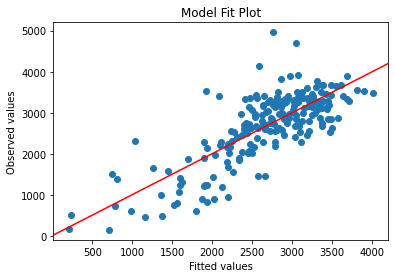

In [37]:
fig, ax = plt.subplots()
ax.scatter(bikePoisOD.fittedvalues, df['BB_COUNT'])
line_fit = sm.OLS(
    df['BB_COUNT'], 
    sm.add_constant(bikePoisOD.fittedvalues, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax, color='r')
ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

Text(0.5, 0, 'Fitted values')

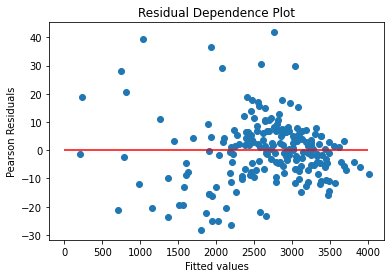

In [38]:
fig, ax = plt.subplots()
ax.scatter(bikePoisOD.fittedvalues, bikePoisOD.resid_pearson)
ax.hlines(0, 4e3, 1, color='r')
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values')

Text(0.5, 0, 'Fitted values')

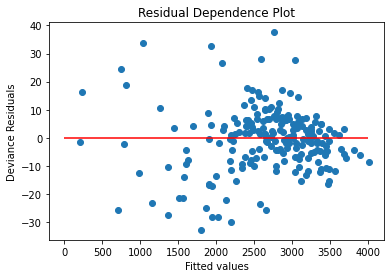

In [39]:
fig, ax = plt.subplots()
ax.scatter(bikePoisOD.fittedvalues, bikePoisOD.resid_deviance)
ax.hlines(0, 4e3, 1, color='r')
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Deviance Residuals')
ax.set_xlabel('Fitted values')

### Choosing a model

- Choosing a model can be difficult


- Important: All models are *wrong*, but some are helpful


- Consider how well *you* understand the model and can *communicate* the findings


- Consider using other model (not in body of report) as sensitivity analysis


- People are *always* developing new (complicated) methods to tackle very specific data problems
    - It is ok (good) to use a simple model even if it is not perfect
    

- If you notice a problem with the data, use Google (search engine) to find solutions
    - Consider the time it might take you to implement a better method and evaluate the pay off

### Communicating Findings
- Opinion: most common mistake is not considering the audience
 - Which details will be helpful and which will be lost?
 - What kinds of graphics will make explanations more clear or give more useful information?
 
**Suggestions for Intro**

- First sentence should introduce the subject-matter in a way that a 5-year old can understand but addresses your client's needs
- Second sentence should focus more on the problem at hand
- Next, what is the problem you are trying to answer?
- Without using jargon, how will you address it?
- In one sentence, what is the most important finding?
- Example for this analysis:

Cycling in and out of Manhattan is commonplace.  However, the daily number entering and leaving by bicycling on any given day is likely influenced by external factors such as weather and time.  This analysis explains the daily count of cyclists crossing the Brooklyn Bridge in terms of external factors.  The models show that several factors are associated with the number of daily crossings, including temperate, weekend, and month.

- Someone who has no idea about your work should be able to follow and understand your first paragraph

**Suggestions for method**

- In this section, you should describe the methods that you used, specifically, how it is appropriate for the data
- The level of detail for this section will vary depending on the audience
- It's typically easier to go into too much detail - more appropriate for a technical audience
- For this class, you should assume that the audience is a subject-matter expert, but without a background in statistics
- For this class, stay away from jargon
 - Example of what not to do: Due to the covariance structure among the observation, we used a mixed-effects model.
 - There are likely many setting where this is appropriate, but in others, this type of language will confuse readers
 - Instead, try to explain the problems
 - Better: This data is includes many observations from individuals over time.  To account for this, we used a mixed-effects model.
- Explain why you modeled the data as done
- Brief example for this analysis:

In this analysis, we aim to determine which external factors are associated with number of daily cyclist crossings and quantify the degree of each association.  Because the outcome for this analysis is count data (daily cyclists crossings), we primarily use Poisson regression to model this daily count with respect to the external factors provided in the data.  As our goal is to broadly understand associations with the outcome, we include all explanatory variables available in the data in our regression model.  This is reasonable because the ratio of rows to columns for the data is large.

We compare several different models to ensure an optimal fit for the model shown below using likelihood-based and quasi-likelihood based metrics.  We choose the model with best fit but association estimates are similar for all models.  We do not consider transforming any variables to further improve fit to make the model easily interpretable after considering model diagnostics.

- Use "we" if you are working on a team, "I" if you're working alone
- I typically avoid passive voice (Poisson regression was used...) in favor of active voice (We/I used Poisson regression..).

**Results**

- Begin the results with a high-level overview of the data without modeling, e.g. number of rows, columns
- Provide table of distribution metrics (mean, standard deviation, or median, IQR)
- Because this dataset is small and simple, it may be reasonable to describe in words.
- If you need to drop observations because they're not appropriate for your purpose, or missing data, etc, a diagram is helpful, especially when rows indicate individual data.
- Graphics are often very powerful for communicating ideas
    - there should be a lot of graphics in your appendix to help you understand the data, from these, choose one or two that directly answers the question of interest
- Provide a table of regression parameters transformed for easy interpretation, e.g. show exp(beta)
    - Model: $E[Y|X=x] = \exp(\beta x)$, present $\exp(\beta)$, not $\beta$
    - Using delta method, we can also transform the confidence intervals
- In words, clearly explain how to interpret the parameters by explaining a couple.
- Brief example of results:

The full data include 214 daily high and low temperature, precipitation, date, and cyclist count between April 1, 2017 and October 31, 2017 with no missing values for any of these variables.  We use all rows of data for the analysis.

The data shows an average (std.) of 2680 (855) crossings.  The average (std.) high and low temperature is 74 (10) and 62 (9) degrees Fahrenheit, respectively.  The average precipitation is 0.13 (0.4), unclear unit in data.

To explain day-to-day fluctuations in number of crossings, we look at several models.  Of the models we consider, we choose to report a Poisson regression model allowing for overdispersion.  We chose a Poisson model because of its simplicity to understand and because we are modeling counts within a fixed period of time.  However, it is clear that allowing for overdispersion was necessary to more accurately estimate standard errors due to the high conditional variance compared to the conditional expectation.  Table 1 below provides rate estimates along with 95% confidence intervals and p-values.  The model shows that there is a statistically significant decrease in the number of crossings with precipitation (p<0.001); for each unit increase in precipitation, crossings decrease by a factor of 0.46.  Further, there is a statistically significant increase in number of daily crossings with temperature (p<0.001); for each 10 degree increase in Fahrenheit, on average the number of crossings increase by a factor of 1.28.

| Variable | Rate (95% CI) | p-value |
| --- | --- | --- |
| May vs Apr | 1.10 (0.97, 1.24) | 0.137 |
| Jun vs Apr | 1.16 (1.01, 1.33) | 0.040 |
| Jul vs Apr | 1.14	(0.98, 1.32) | 0.097 |
| Aug vs Apr | 1.25	(1.08, 1.43) | 0.002 |
| Sep vs Apr | 1.16	(1.02, 1.32) | 0.027 |
| Oct vs Apr | 1.11	(0.98, 1.25) | 0.094 |
| Weekend vs Weekday | 0.89 (0.83, 0.95) | 0.001 |
| High Temp (per 10 deg F) | 1.28 (1.20, 1.37) | <0.001 |
| Low Temp (per 10 deg F) | 0.83 (0.76, 0.90) | 0.000 |
| Day of Month | 1.00 (1.00, 1.00) | 0.697 |
| Precipitation | 0.46 (0.40, 0.54) | 0.000 |

Table 1: The table above shows rate ratios (and 95% confidence intervals) for the number of cyclists crossing the Brooklyn bridge each day along with p-values for each factor assessed.

**Conclusion**

- Restate what you attempted to answer
- State any potential limitations
- Summarize finds for the purpose of the analysis
- Brief example:

Our purpose for this analysis is to simply explain the daily number of cyclists crossing the Brooklyn Bridge in terms of factors such as temperature and precipitation.  While it seems likely that there may be other external variable that would further improve our models, such as events in the city or subway delays, this model seems characterize crossings well.  That is, precipitation, temperature, and weekdays, for example, are certainly associated, if not contribute to the number of daily crossings.

In [40]:
params = pd.DataFrame({'Rate': bikePoisOD.params})
ci_table = bikePoisOD.conf_int().rename(columns={0:"Lower", 1:"Upper"})
bike_table = params.join(ci_table).applymap(np.exp).round(2)
bike_table['pvalue'] = bikePoisOD.pvalues.round(3)
bike_table

,Rate,Lower,Upper,pvalue
Intercept,1296.57,976.87,1720.91,0.000
MONTH[T.Aug],1.25,1.08,1.43,0.002
MONTH[T.Jul],1.14,0.98,1.32,0.097
MONTH[T.Jun],1.16,1.01,1.33,0.040
MONTH[T.May],1.10,0.97,1.24,0.137
MONTH[T.Oct],1.11,0.98,1.25,0.094
MONTH[T.Sep],1.16,1.02,1.32,0.027
DAY,1.00,1.00,1.00,0.697
WEEKEND,0.89,0.83,0.95,0.001
HIGH_T10,1.28,1.20,1.37,0.000


Question: There is always a single best model
- a) True
- b) False


Question: In order to use AIC, I must understand the underlying math
- a) True
- b) False


Check-in: How do you feel about the first assignment?
- a) Good, I understand the expectations and I feel that I have the skills to do a good job
- b) Unsure, I understand the expectations but I feel that I'm missing some of the skills necessary to do a good job
- c) Not good, I am unclear of the expectations